In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [16]:
# Load the dataset
titanic_df = pd.read_csv(r"C:\Users\Zimm\Desktop\CodSoft\Titanic\Titanic-Dataset.csv")

# Exploratory data analysis

In [17]:
# Preview the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_df.shape

(891, 12)

In [19]:
# Overview of columns and data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# Summary statistics of numerical columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Dropping unnecessary columns
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [23]:
# Filling missing values in Age column with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [24]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [25]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
# Checking for duplicate values in the dataset
titanic_df.duplicated().sum()

0

In [27]:
# Checking the survival of people
titanic_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data Visualisation

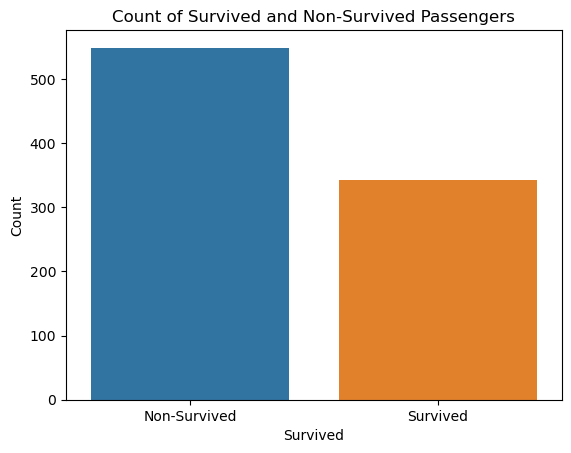

In [28]:

sns.countplot(data=titanic_df, x='Survived')
plt.title('Count of Survived and Non-Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.show()

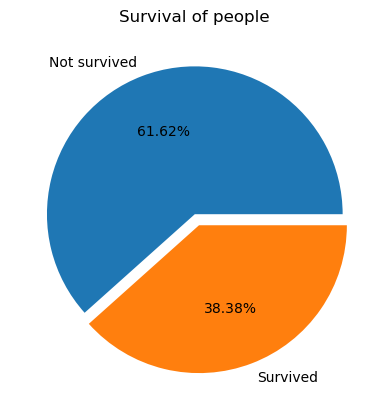

In [30]:
plt.pie(titanic_df['Survived'].value_counts(),explode=[0,0.08],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

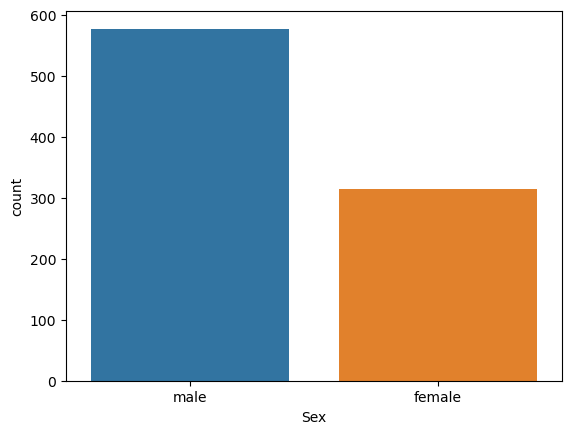

In [31]:
sns.countplot(x='Sex', data=titanic_df)

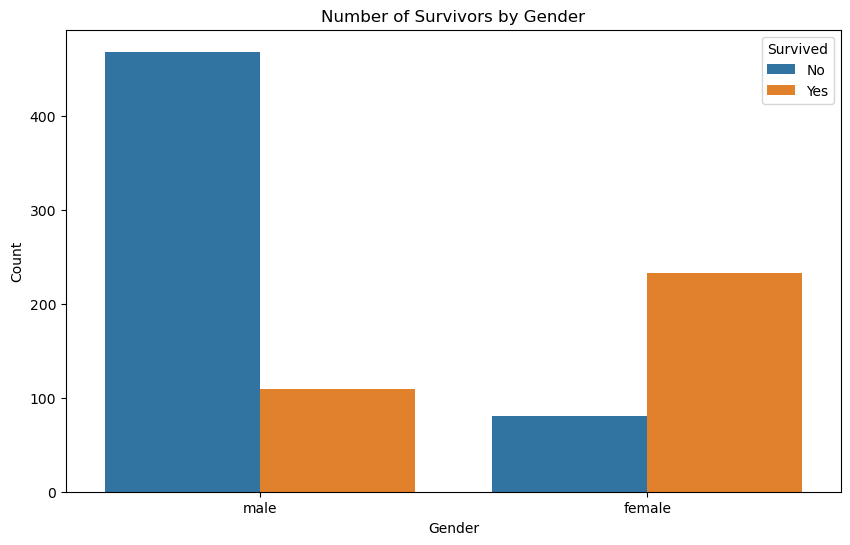

In [32]:
# Create a countplot for survival by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

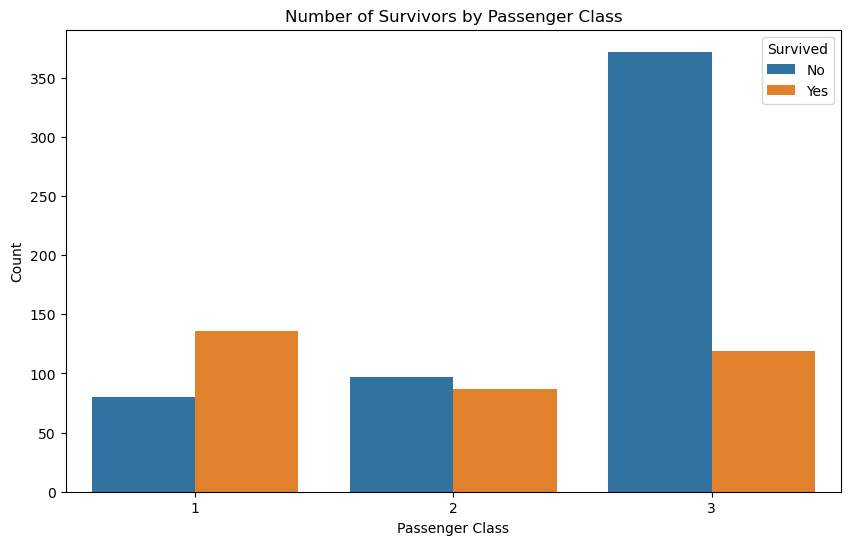

In [33]:
# Create a countplot for survival by passenger class (Pclass)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Number of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

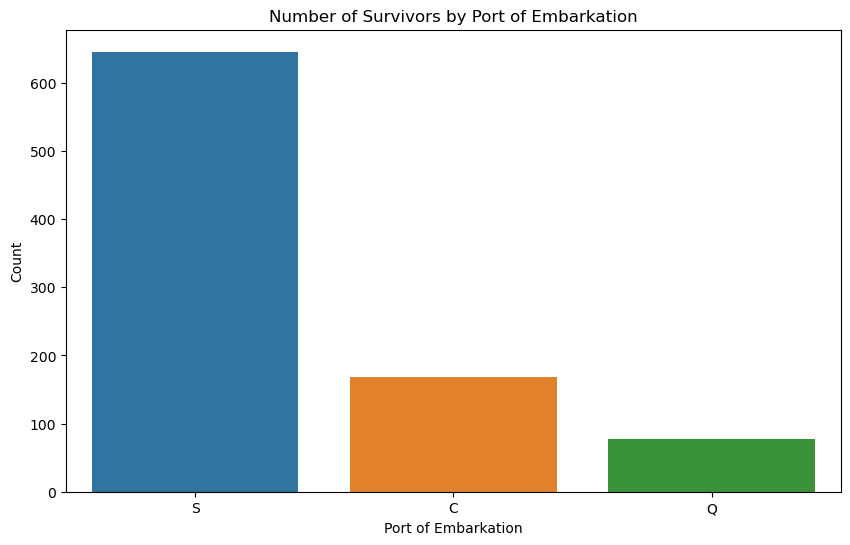

In [34]:
# Step 3: Create a countplot for survival by port of embarkation (Embarked)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Embarked')
plt.title('Number of Survivors by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

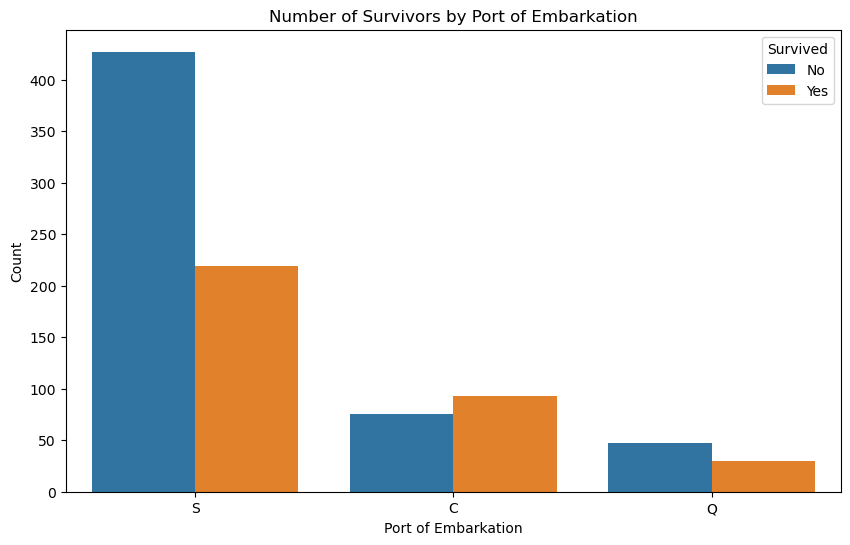

In [35]:
# Step 3: Create a countplot for survival by port of embarkation (Embarked)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Embarked', hue='Survived')
plt.title('Number of Survivors by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

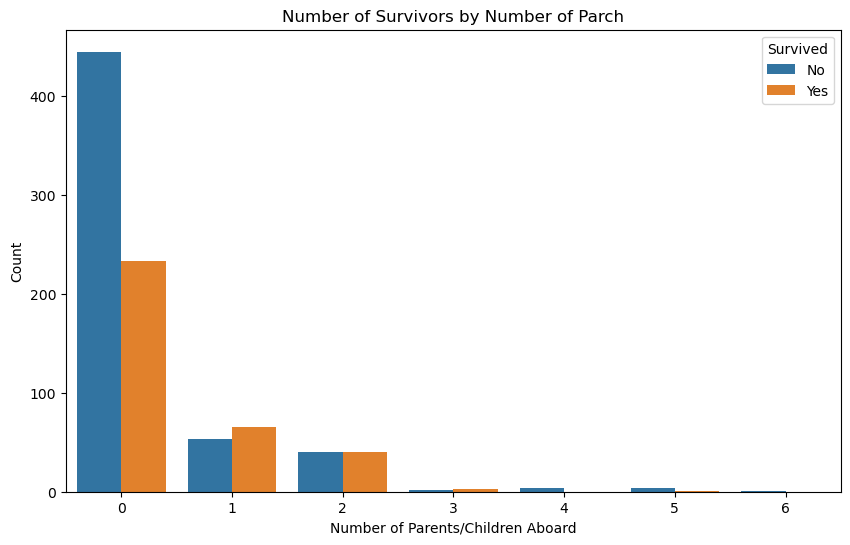

In [36]:
# Create a countplot for survival by number of parents/children aboard (Parch)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Parch', hue='Survived')
plt.title('Number of Survivors by Number of Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

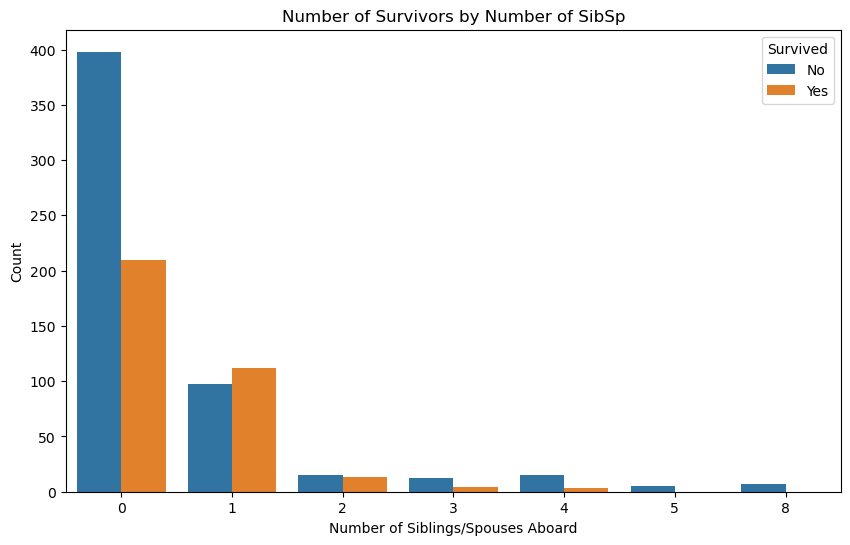

In [37]:
# Step 3: Create a countplot for survival by number of siblings/spouses aboard (SibSp)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='SibSp', hue='Survived')
plt.title('Number of Survivors by Number of SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

C:\Users\Zimm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


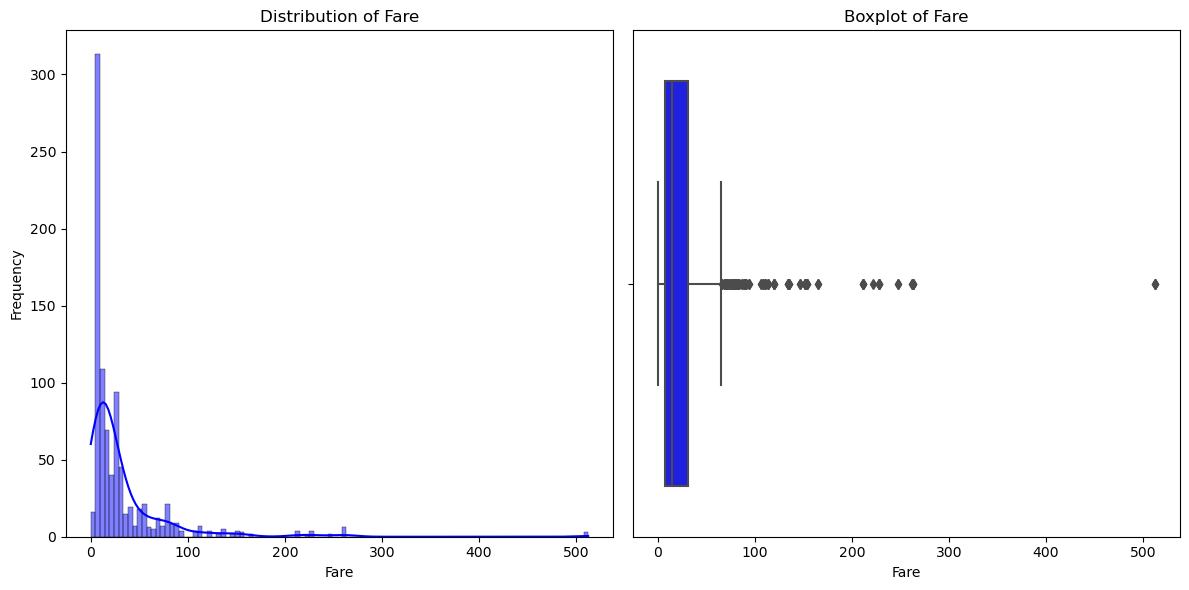

In [38]:
# Plot the distribution of Fare
plt.figure(figsize=(12, 6))

# Histogram for Fare
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Fare'], kde=True, color='blue')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_df['Fare'], color='blue')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()



C:\Users\Zimm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


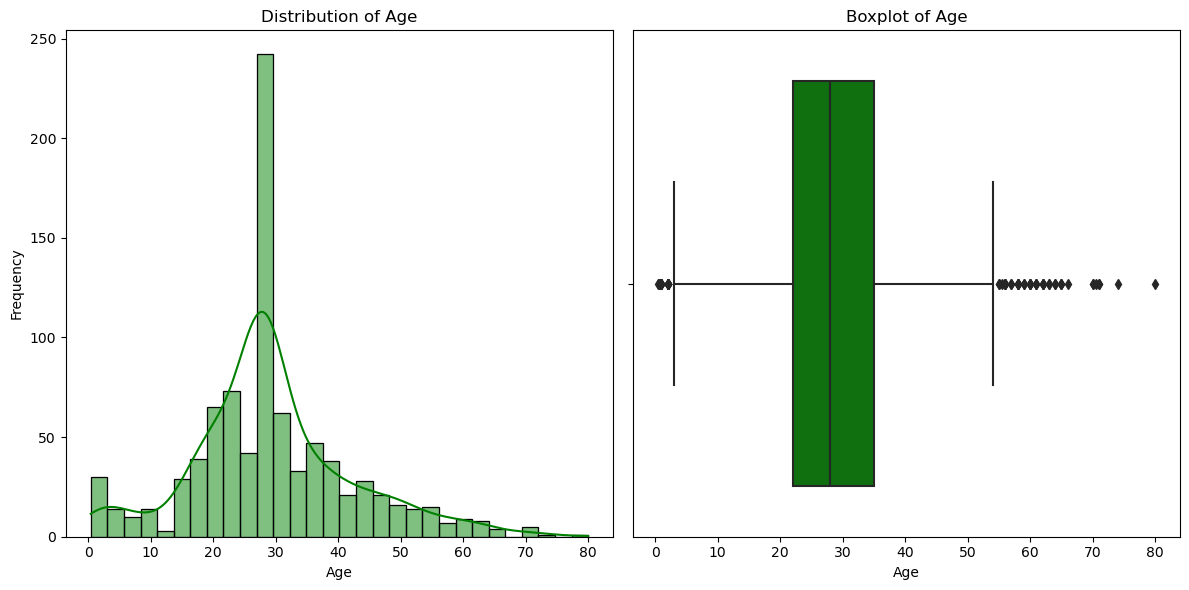

In [39]:
# Plot the distribution of Age
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Age'].dropna(), kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_df['Age'].dropna(), color='green')
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

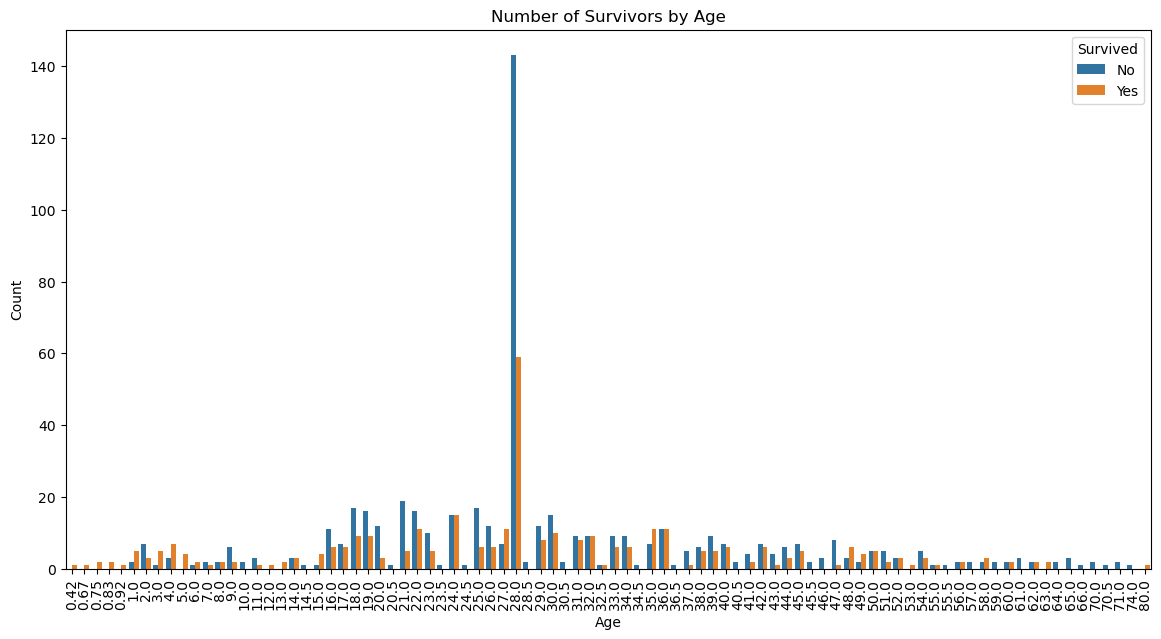

In [40]:
# Step 3: Create a countplot for survival by age
plt.figure(figsize=(14, 7))
sns.countplot(data=titanic_df, x='Age', hue='Survived')
plt.title('Number of Survivors by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()

In [41]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [43]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Label Encoding

Change the Sex Column and Embarked Column from categorical to numerical for model training

In [44]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Sex' column
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])

# Apply LabelEncoder to 'Embarked' column, handle missing values if any
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'].astype(str))

# Display the first few rows to verify changes
print(titanic_df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


In [45]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.7+ KB


In [46]:
df_num = titanic_df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

In [47]:
df_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.0,1,3,2,0
1,71.2833,0,1,38.0,0,1,0,1
2,7.9250,0,0,26.0,0,3,2,1
3,53.1000,0,1,35.0,0,1,2,1
4,8.0500,0,0,35.0,1,3,2,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.0,1,2,2,0
887,30.0000,0,0,19.0,0,1,2,1
888,23.4500,2,1,28.0,0,3,2,0
889,30.0000,0,0,26.0,1,1,0,1


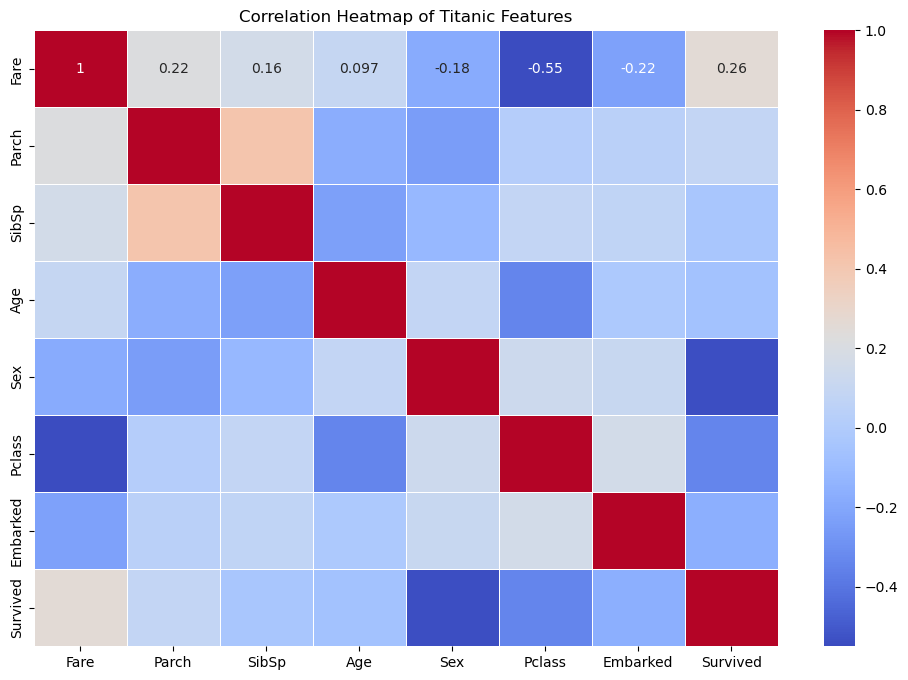

In [48]:
# Compute the correlation matrix
correlation_matrix = df_num.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Features')
plt.show()

# Feature Selection

In [50]:
# Select features for prediction
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_df[features]
y = titanic_df['Survived']

# Data Splitting

In [51]:
# Step 6: Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Training: 
# Four different models were trained:-
1. Logistic Regression
2. Random Forest Classifier
3. Decision Tree Classifier
4. K-Nearest Neighbors (KNN)

In [52]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [53]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [54]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



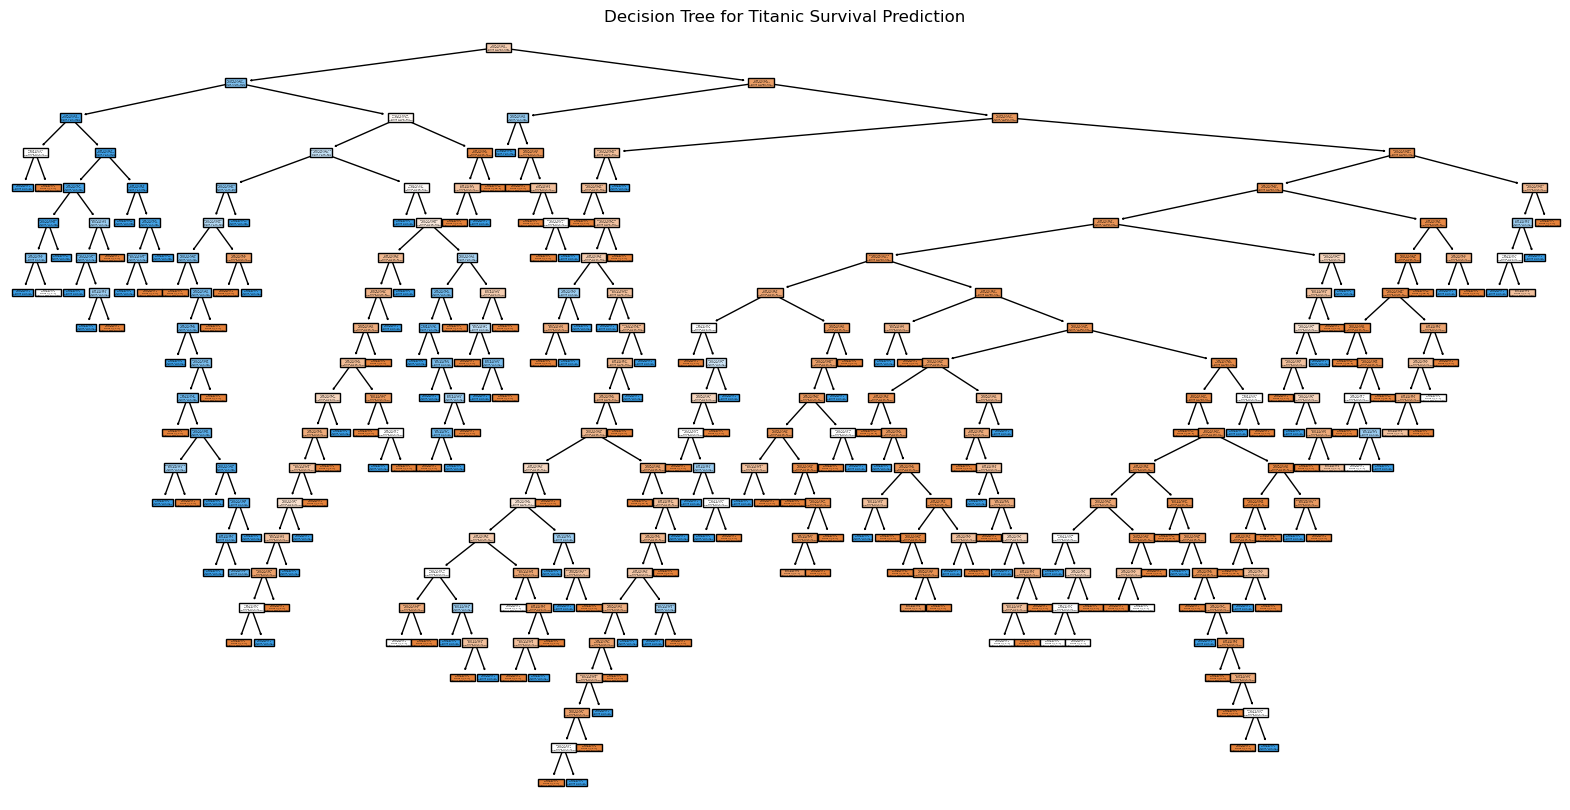

In [55]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree for Titanic Survival Prediction')
plt.show()


In [56]:
# Train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.54      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



In [57]:
# Create a DataFrame to store the accuracy scores
accuracy_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy': [accuracy_log_reg, accuracy_rf, accuracy_dt, accuracy_knn]
})

# Print the accuracy table
print(accuracy_table)


                 Model  Accuracy
0  Logistic Regression  0.810056
1        Random Forest  0.821229
2        Decision Tree  0.782123
3                  KNN  0.720670


# Model Comparison

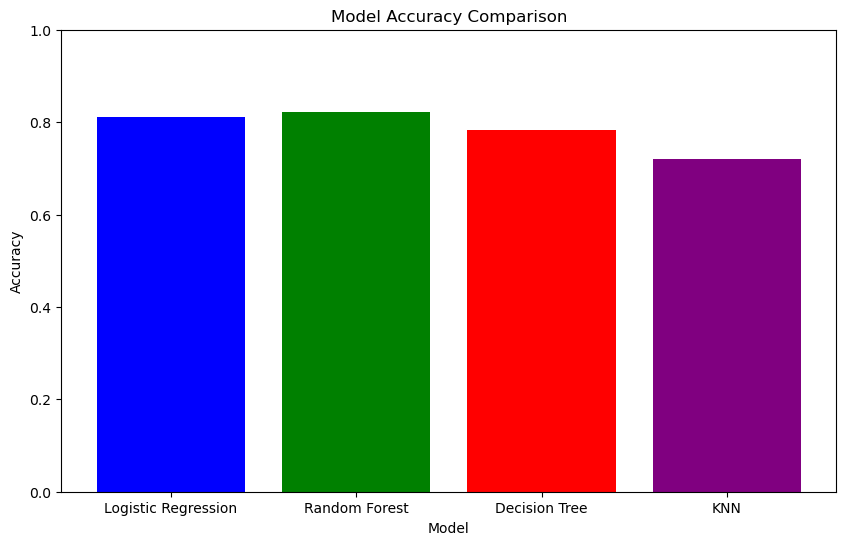

In [58]:
# Create a bar plot for model comparison
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [accuracy_log_reg, accuracy_rf, accuracy_dt, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


In [59]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log_reg)
print()

# Calculate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
print()

# Calculate confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)
print()

# Calculate confusion matrix for K-Nearest Neighbors
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for K-Nearest Neighbors:")
print(conf_matrix_knn)


Confusion Matrix for Logistic Regression:
[[90 15]
 [19 55]]

Confusion Matrix for Random Forest:
[[92 13]
 [19 55]]

Confusion Matrix for Decision Tree:
[[83 22]
 [17 57]]

Confusion Matrix for K-Nearest Neighbors:
[[89 16]
 [34 40]]


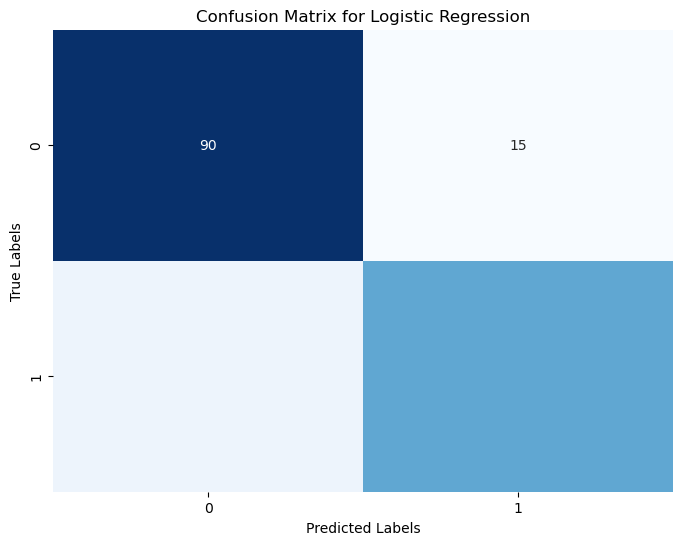

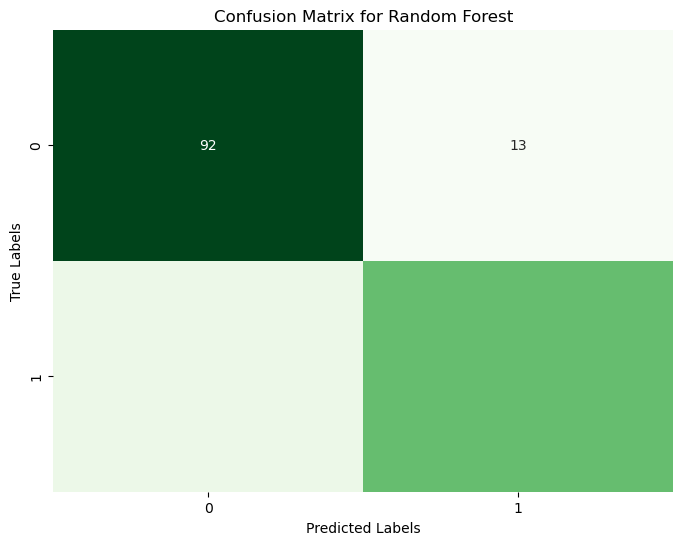

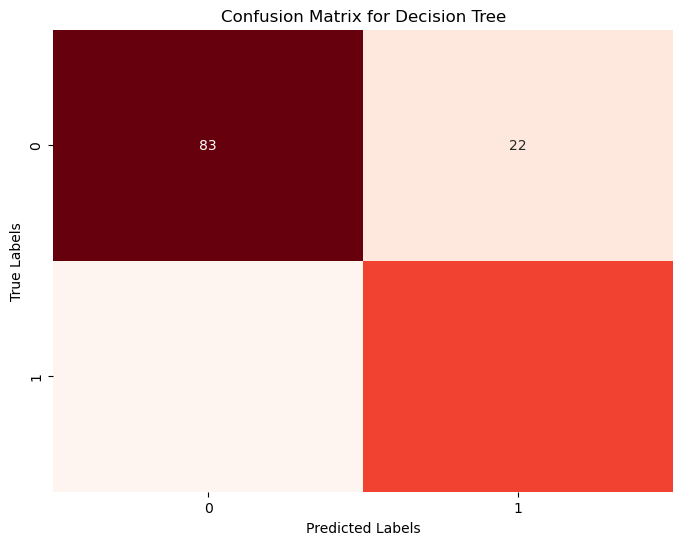

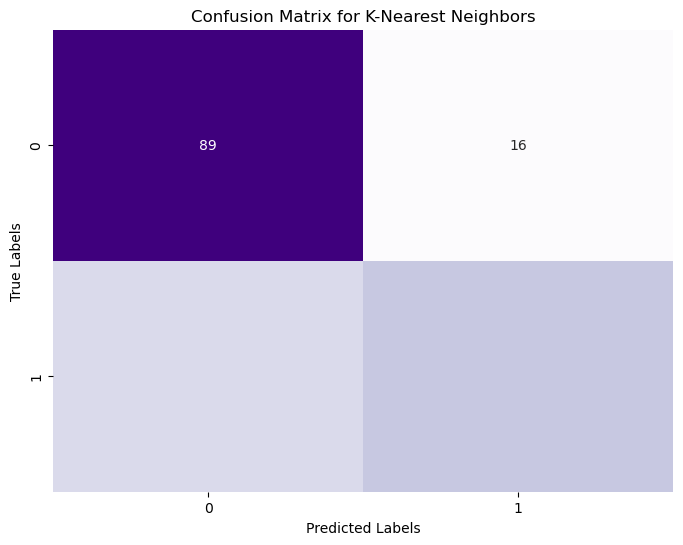

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Conclusion


Best Performing Model: The Random Forest classifier emerged as the best-performing model with the highest accuracy and good generalization capability due to its ensemble learning approach.

Interpretability: While the Decision Tree model is highly interpretable, it may not generalize as well as the Random Forest. Logistic Regression offers a good balance of simplicity and performance.

Performance Trade-offs: The KNN model, while intuitive, was the least accurate, possibly due to its sensitivity to parameter choices and the nature of the data.


Overall, the Random Forest model is recommended for predicting Titanic survival due to its superior accuracy and robustness. However, depending on the specific use case, other models like Decision Tree or Logistic Regression might be preferred for their interpretability and simplicity.